# HW2 2021300003004 张天骏

# 前三问：

将约束条件带入优化问题得到：$$ v(k)=\underset{k' }{ \max } [\frac{(k^\alpha +(1-\delta)k-k')^{1-\gamma}}{1-\gamma}+\beta v(k')]  $$

最优化问题关于自变量 $k' $求导得到FOC：$$ \beta v(k_{t+1})-(k^\alpha_{t} +(1-\delta)k_{t} -k_{t+1})^{-\gamma}=0 $$

应用包络引理得到：$$ v'(k_{t})-(k^\alpha_{t} +(1-\delta)k_{t} -k_{t+1})^{-\gamma}(\alpha k^{\alpha-1}_{t}+(1-\delta))=0 $$

两个方程联立得到EE:$$\beta  (k^\alpha_{t+1} +(1-\delta)k_{t+1} -k_{t+2})^{-\gamma}(\alpha k^{\alpha-1}_{t+1}+(1-\delta))=(k^\alpha_{t} +(1-\delta)k_{t} -k_{t+1})^{-\gamma}$$

对于稳态$k^*$，带入EE得到：$$k^*=\left[  \frac{1-\beta(1-\delta)}{\alpha \beta} \right] ^{ 1/(\alpha-1)  }$$

# 第四问：

给定$\alpha=\frac{1}{3},\beta=0.95,\delta=0.1,\gamma=1.5$ 可以求出$k^* \approx 3.227$

下面根据参考代码改造得到本问程序：

In [2]:
# import

import timeit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beta = 0.95
alpha = 1 / 3
gamma = 1.5
delta = 0.1
kss = ((1 - beta * (1-delta)) / (alpha * beta)) ** (1 / (alpha - 1))
kmin = 0.5 * kss
kmax = 1.5 * kss
n = 500
kgrid = np.linspace(kmin, kmax, n)

In [3]:
# step 1

V0 = np.zeros(n)

In [4]:
# step 2
def V_update(V):
    global gamma
    global delta
    V_new = np.zeros(n)  # initialize updated value function and policy function
    g_new = np.zeros(n)
    for i in range(n):  # loop over grid points
        k = kgrid[i]
        k_bound = k**alpha+(1-delta)*k  # keep non-zero consumption
        V_max = -np.inf  # initialize maximum value
        g_k = kss  # initialize g_k
        for j in range(n):  # loop over possible k_next
            k_next = kgrid[j]
            V_next = V[j]
            if k_next < k_bound:  # check feasibility
                c = k**alpha - k_next + (1-delta)*k
                V_current = (c**(1-gamma))/(1-gamma)+beta*V_next
                if V_current > V_max:
                    V_max = V_current
                    g_k = k_next
        V_new[i] = V_max  # save
        g_new[i] = g_k
    return V_new, g_new

In [5]:
# step 3
def V_iteration(V_initial):
    V = V_initial
    error = np.inf
    count = 0
    max_iter = 1000
    print_skip = 50
    tol = 1e-7
    while count < max_iter and error > tol:
        V_new, g_new = V_update(V)
        error = np.max(np.abs(V_new - V))
        V = V_new
        count = count + 1
        if count % print_skip == 0:
            print(f"Error at iteration {count} is {error}.")
    if error > tol:
        print("Failed to converge!")
    else:
        print(f"\nConverged in {count} iterations.")
    return V_new, g_new

In [6]:
start_time = timeit.default_timer()
V, g = V_iteration(V0)
print("The time difference is :", timeit.default_timer() - start_time)

Error at iteration 50 is 0.1556269009771043.
Error at iteration 100 is 0.011973136288304431.
Error at iteration 150 is 0.0009212726757112932.
Error at iteration 200 is 7.08873032806423e-05.
Error at iteration 250 is 5.454421817319144e-06.
Error at iteration 300 is 4.1969038022671157e-07.

Converged in 328 iterations.
The time difference is : 99.9083483


Text(0.5, 1.0, 'value function')

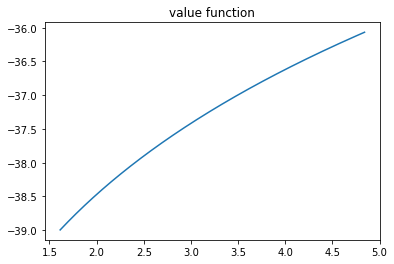

In [9]:
plt.plot(kgrid,V)
plt.title("value function")

Text(0.5, 1.0, 'policy function')

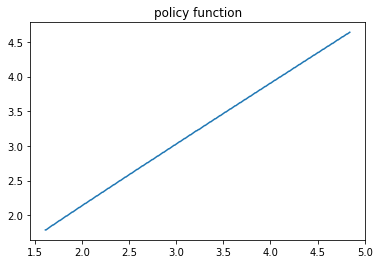

In [10]:
plt.plot(kgrid,g)
plt.title("policy function")

# 第五问

我以数值计算得到的稳态与理论上的稳态的欧氏距离来评价数值模拟的准确性。在这里以防所求的两个数组之差没有严格的零点，我将条件放松到“两个数组之差小于$10^{-3}$”。这时候我们会得到一组指数$z$，我取其均值$\bar{z}$，按照公式$assess=0.5+\frac{\bar{z}}{500}$得到了估计出的稳态点。

In [102]:
x=g-kgrid
y=np.where(abs(x)<1e-3)
z=np.mean(y)
assess=0.5* kss+z*kss/500
err=(2*(assess-kss)**(2))**(0.5)
print(err)

0.004564219481369636


Text(0.5, 1.0, 'assessment')

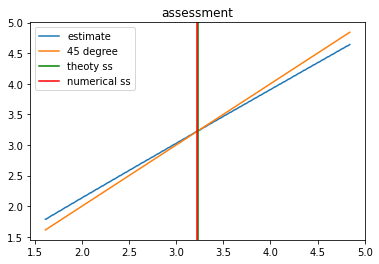

In [106]:
plt.plot(kgrid,g,label='estimate')
plt.plot(kgrid,kgrid,label='45 degree')
plt.axvline(x=kss,color='green',label='theoty ss')
plt.axvline(x=assess,color='red',label='numerical ss')
plt.legend()
plt.title("assessment")

# 第六问

基于目前的算法，我认为可以从以下几个方面来进一步提升估计的准确性：

1.细化状态空间：比如增加资本存量网格kgrid的点数n，可以提高算法的精度。

2.调整收敛标准：调整收敛标准(加强终止条件)和迭代次数，使得算法可以更精细地搜索值函数的收敛点。

3.尝试不同的初始化值：因为代码并没有明确给出$g_k$的初始条件，所以不妨尝试不同的初始值设定，也许可以影响值函数迭代的收敛速度和结果的准确性。